In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras
from keras import layers
from keras.layers import Dropout

In [35]:
# Charger le fichier CSV
file_path = 'OurData.csv'
df = pd.read_csv(file_path)
# Supprimer les colonnes 'Date' et 'Heure'
data = df.drop(["Date", "Heure"], axis=1)
# Convertir toutes les colonnes en float
data = data.astype(float)

In [36]:
data.isnull().sum()

RH         1081
AirTC      1081
G          1081
Rn_Avg     1081
Le_flux    1096
Ws         1097
Psat       1081
P_air      1081
VPD        1081
Rs            0
dtype: int64

In [37]:
# Imputer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
# Remplacer les valeurs manquantes par la moyenne dans les colonnes spécifiées
colonnes_a_traiter = ['RH', 'AirTC', 'G', 'Rn_Avg', 'Le_flux', 'Ws', 'Psat', 'P_air', 'VPD', 'Rs']
data[colonnes_a_traiter] = data[colonnes_a_traiter].fillna(-9999999999999)

In [38]:
data.isnull().sum()

RH         0
AirTC      0
G          0
Rn_Avg     0
Le_flux    0
Ws         0
Psat       0
P_air      0
VPD        0
Rs         0
dtype: int64

In [39]:
# Séparer les données en entrées (features) et cible (target)
X = data.drop("Le_flux", axis=1)
y = data["Le_flux"]

In [40]:
# Calculer la moyenne et l'écart-type des caractéristiques (features)
mean = X.mean(axis=0)
std = X.std(axis=0)

In [41]:
# Normaliser les caractéristiques (features)
X -= mean
X /= std

In [42]:
# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
# Normaliser la cible (target)
mean_target = y_train.mean()
std_target = y_train.std()
y_train -= mean_target
y_train /= std_target
y_test -= mean_target
y_test /= std_target

In [43]:
#Creation do model 
model = keras.Sequential([ 
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
# Entraîner le modèle
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_split=0.2)
# Évaluer le modèle sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - mae: 0.0242   
Test Loss: 0.011554104276001453
Test MAE: 0.02318180352449417


In [44]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)
# Afficher les prédictions et les valeurs réelles correspondantes
for i in range(len(predictions)):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {predictions[i][0]}")


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Actual: 0.3466090101461702, Predicted: 0.33794403076171875
Actual: 0.34660901014616374, Predicted: 0.3589193820953369
Actual: -2.884744751488302, Predicted: -2.9314122200012207
Actual: 0.34660901014616025, Predicted: 0.3269144892692566
Actual: 0.34660901014616374, Predicted: 0.3213772773742676
Actual: 0.34660901014616374, Predicted: 0.356217622756958
Actual: 0.34660901014616713, Predicted: 0.3606404662132263
Actual: 0.3466090101461712, Predicted: 0.2939274311065674
Actual: -2.884744751488302, Predicted: -2.9434494972229004
Actual: 0.3466090101461655, Predicted: 0.36069029569625854
Actual: 0.34660901014616374, Predicted: 0.3533134460449219
Actual: 0.3466090101461645, Predicted: 0.3038000464439392
Actual: 0.3466090101461668, Predicted: 0.2939274311065674
Actual: 0.34660901014616374, Predicted: 0.2977990508079529
Actual: 0.34660901014616413, Predicted: 0.338520348072052
Actual: 0.34660901014616374, Predicted: 0.36381077766418457
Actual: 0.34660901014

In [45]:
print(type(y_test))
print(type(predictions))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,732 (38.02 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,867 (19.02 KB)

In [47]:
# Save the trained model
model.save("ourModel.h5")
print("Trained model saved successfully.")

Trained model saved successfully.


In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on training data
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)
print("Testing R-squared:", test_r2)


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MSE: 0.010481826531424272
Training MAE: 0.022801321312453274
Training R-squared: 0.9895169000113371
Testing MSE: 0.01166573455038449
Testing MAE: 0.023181794061582855
Testing R-squared: 0.987953955294124


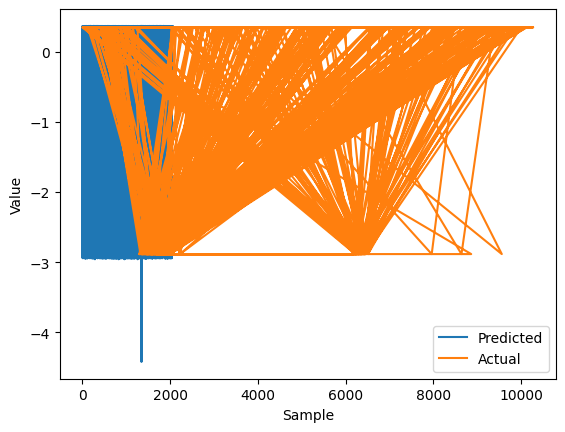

In [49]:

# Plot the predicted and actual values for the testing data
plt.plot(test_predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()